In [56]:
import pandas as pd

In [57]:
wn = pd.read_csv('/content/Sky_rose_Dataset_Wine.csv')

In [58]:
wn.head(10)

,Week,White wine: (Canada)
0,30/08/2020,22
1,06/09/2020,24
2,13/09/2020,20
3,20/09/2020,21
4,27/09/2020,20
5,04/10/2020,22
6,11/10/2020,28
7,18/10/2020,23
8,25/10/2020,22
9,01/11/2020,19


In [59]:
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Calculate the 3-week moving average for White wine
wn['White_wine_3w_MA'] = wn['White wine: (Canada)'].rolling(window=3).mean()

# Display the first few rows with the new column
display(wn.head())

# Drop the first two rows as the 3-week moving average will be NaN
wn_cleaned = wn.dropna(subset=['White_wine_3w_MA']).copy()

# Calculate MAPE for 3-week moving average
mape_ww_3w = mean_absolute_percentage_error(wn_cleaned['White wine: (Canada)'], wn_cleaned['White_wine_3w_MA'])
print(f'MAPE (White wine 3-week MA): {mape_ww_3w:.4f}')

# Calculate MSE for 3-week moving average
mse_ww_3w = mean_squared_error(wn_cleaned['White wine: (Canada)'], wn_cleaned['White_wine_3w_MA'])
print(f'MSE (White wine 3-week MA): {mse_ww_3w:.4f}')

# Calculate RMSE for 3-week moving average
rmse_ww_3w = np.sqrt(mse_ww_3w)
print(f'RMSE (White wine 3-week MA): {rmse_ww_3w:.4f}')

,Week,White wine: (Canada),White_wine_3w_MA
0,30/08/2020,22,NaN
1,06/09/2020,24,NaN
2,13/09/2020,20,22.000000
3,20/09/2020,21,21.666667
4,27/09/2020,20,20.333333


MAPE (White wine 3-week MA): 0.0619
MSE (White wine 3-week MA): 7.0829
RMSE (White wine 3-week MA): 2.6614


In [60]:
# Calculate the 5-week moving average for White wine
wn['White_wine_5w_MA'] = wn['White wine: (Canada)'].rolling(window=5).mean()

# Display the first few rows with the new column
display(wn.head())

,Week,White wine: (Canada),White_wine_3w_MA,White_wine_5w_MA
0,30/08/2020,22,NaN,NaN
1,06/09/2020,24,NaN,NaN
2,13/09/2020,20,22.000000,NaN
3,20/09/2020,21,21.666667,NaN
4,27/09/2020,20,20.333333,21.4


In [61]:
# Drop the first four rows as the 5-week moving average will be NaN
wn_cleaned_5w = wn.dropna(subset=['White_wine_5w_MA']).copy()

# Calculate MAPE for 5-week moving average
mape_ww_5w = mean_absolute_percentage_error(wn_cleaned_5w['White wine: (Canada)'], wn_cleaned_5w['White_wine_5w_MA'])
print(f'MAPE (White wine 5-week MA): {mape_ww_5w:.4f}')

# Calculate MSE for 5-week moving average
mse_ww_5w = mean_squared_error(wn_cleaned_5w['White wine: (Canada)'], wn_cleaned_5w['White_wine_5w_MA'])
print(f'MSE (White wine 5-week MA): {mse_ww_5w:.4f}')

# Calculate RMSE for 5-week moving average
rmse_ww_5w = np.sqrt(mse_ww_5w)
print(f'RMSE (White wine 5-week MA): {rmse_ww_5w:.4f}')

MAPE (White wine 5-week MA): 0.0843
MSE (White wine 5-week MA): 12.4166
RMSE (White wine 5-week MA): 3.5237


In [62]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit the Simple Exponential Smoothing model for White wine
# You might need to tune the 'smoothing_level' parameter (alpha)
model_ses_ww = SimpleExpSmoothing(wn['White wine: (Canada)'])
fit_model_ses_ww = model_ses_ww.fit()

# Get the smoothed values
wn['White_wine_SES'] = fit_model_ses_ww.fittedvalues

# Display the first few rows with the new column
display(wn.head())

,Week,White wine: (Canada),White_wine_3w_MA,White_wine_5w_MA,White_wine_SES
0,30/08/2020,22,NaN,NaN,22.0
1,06/09/2020,24,NaN,NaN,22.0
2,13/09/2020,20,22.000000,NaN,24.0
3,20/09/2020,21,21.666667,NaN,20.0
4,27/09/2020,20,20.333333,21.4,21.0


In [63]:
# Drop the first row as the Simple Exponential Smoothing will be NaN for the first data point
wn_cleaned_ses = wn.dropna(subset=['White_wine_SES']).copy()

# Calculate MAPE for Simple Exponential Smoothing
mape_ses_ww = mean_absolute_percentage_error(wn_cleaned_ses['White wine: (Canada)'], wn_cleaned_ses['White_wine_SES'])
print(f'MAPE (White wine SES): {mape_ses_ww:.4f}')

# Calculate MSE for Simple Exponential Smoothing
mse_ses_ww = mean_squared_error(wn_cleaned_ses['White wine: (Canada)'], wn_cleaned_ses['White_wine_SES'])
print(f'MSE (White wine SES): {mse_ses_ww:.4f}')

# Calculate RMSE for Simple Exponential Smoothing
rmse_ses_ww = np.sqrt(mse_ses_ww)
print(f'RMSE (White wine SES): {rmse_ses_ww:.4f}')

MAPE (White wine SES): 0.0809
MSE (White wine SES): 11.8092
RMSE (White wine SES): 3.4364


In [64]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Double Exponential Smoothing model for White wine
# You might need to tune the 'smoothing_level' (alpha) and 'smoothing_trend' (beta) parameters
model_des_ww = ExponentialSmoothing(wn['White wine: (Canada)'], trend='add')
fit_model_des_ww = model_des_ww.fit()

# Get the smoothed values
wn['White_wine_DES'] = fit_model_des_ww.fittedvalues

# Display the first few rows with the new column
display(wn.head())

,Week,White wine: (Canada),White_wine_3w_MA,White_wine_5w_MA,White_wine_SES,White_wine_DES
0,30/08/2020,22,NaN,NaN,22.0,21.999980
1,06/09/2020,24,NaN,NaN,22.0,21.992338
2,13/09/2020,20,22.000000,NaN,24.0,23.992338
3,20/09/2020,21,21.666667,NaN,20.0,19.992338
4,27/09/2020,20,20.333333,21.4,21.0,20.992338


In [65]:
# Drop the first row as the Double Exponential Smoothing will have NaN for the first data point
wn_cleaned_des = wn.dropna(subset=['White_wine_DES']).copy()

# Calculate MAPE for Double Exponential Smoothing
mape_des_ww = mean_absolute_percentage_error(wn_cleaned_des['White wine: (Canada)'], wn_cleaned_des['White_wine_DES'])
print(f'MAPE (White wine DES): {mape_des_ww:.4f}')

# Calculate MSE for Double Exponential Smoothing
mse_des_ww = mean_squared_error(wn_cleaned_des['White wine: (Canada)'], wn_cleaned_des['White_wine_DES'])
print(f'MSE (White wine DES): {mse_des_ww:.4f}')

# Calculate RMSE for Double Exponential Smoothing
rmse_des_ww = np.sqrt(mse_des_ww)
print(f'RMSE (White wine DES): {rmse_des_ww:.4f}')

MAPE (White wine DES): 0.0809
MSE (White wine DES): 11.8091
RMSE (White wine DES): 3.4364


In [66]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Triple Exponential Smoothing model for White wine (Holt-Winters)
# You might need to tune the parameters like 'seasonal_periods'
model_tes_ww = ExponentialSmoothing(wn['White wine: (Canada)'], trend='add', seasonal='add', seasonal_periods=52) # Assuming weekly data with a yearly seasonality (52 weeks)
fit_model_tes_ww = model_tes_ww.fit()

# Get the smoothed values
wn['White_wine_TES'] = fit_model_tes_ww.fittedvalues

# Display the first few rows with the new column
display(wn.head())

,Week,White wine: (Canada),White_wine_3w_MA,White_wine_5w_MA,White_wine_SES,White_wine_DES,White_wine_TES
0,30/08/2020,22,NaN,NaN,22.0,21.999980,23.256213
1,06/09/2020,24,NaN,NaN,22.0,21.992338,22.269717
2,13/09/2020,20,22.000000,NaN,24.0,23.992338,21.500868
3,20/09/2020,21,21.666667,NaN,20.0,19.992338,21.317271
4,27/09/2020,20,20.333333,21.4,21.0,20.992338,20.878463


In [67]:
# Drop rows with NaN values in the TES column for error calculation
wn_cleaned_tes = wn.dropna(subset=['White_wine_TES']).copy()

# Calculate MAPE for Triple Exponential Smoothing
mape_tes_ww = mean_absolute_percentage_error(wn_cleaned_tes['White wine: (Canada)'], wn_cleaned_tes['White_wine_TES'])
print(f'MAPE (White wine TES): {mape_tes_ww:.4f}')

# Calculate MSE for Triple Exponential Smoothing
mse_tes_ww = mean_squared_error(wn_cleaned_tes['White wine: (Canada)'], wn_cleaned_tes['White_wine_TES'])
print(f'MSE (White wine TES): {mse_tes_ww:.4f}')

# Calculate RMSE for Triple Exponential Smoothing
rmse_tes_ww = np.sqrt(mse_tes_ww)
print(f'RMSE (White wine TES): {rmse_tes_ww:.4f}')

MAPE (White wine TES): 0.0493
MSE (White wine TES): 3.2478
RMSE (White wine TES): 1.8022


In [68]:
print("Error Metrics for Different Models:")
print(f"3-Week Moving Average:")
print(f"  MAPE: {mape_ww_3w:.4f}")
print(f"  MSE: {mse_ww_3w:.4f}")
print(f"  RMSE: {rmse_ww_3w:.4f}")
print("\n5-Week Moving Average:")
print(f"  MAPE: {mape_ww_5w:.4f}")
print(f"  MSE: {mse_ww_5w:.4f}")
print(f"  RMSE: {rmse_ww_5w:.4f}")
print("\nSimple Exponential Smoothing (SES):")
print(f"  MAPE: {mape_ses_ww:.4f}")
print(f"  MSE: {mse_ses_ww:.4f}")
print(f"  RMSE: {rmse_ses_ww:.4f}")
print("\nDouble Exponential Smoothing (DES):")
print(f"  MAPE: {mape_des_ww:.4f}")
print(f"  MSE: {mse_des_ww:.4f}")
print(f"  RMSE: {rmse_des_ww:.4f}")
print("\nTriple Exponential Smoothing (TES):")
print(f"  MAPE: {mape_tes_ww:.4f}")
print(f"  MSE: {mse_tes_ww:.4f}")
print(f"  RMSE: {rmse_tes_ww:.4f}")

Error Metrics for Different Models:
3-Week Moving Average:
  MAPE: 0.0619
  MSE: 7.0829
  RMSE: 2.6614

5-Week Moving Average:
  MAPE: 0.0843
  MSE: 12.4166
  RMSE: 3.5237

Simple Exponential Smoothing (SES):
  MAPE: 0.0809
  MSE: 11.8092
  RMSE: 3.4364

Double Exponential Smoothing (DES):
  MAPE: 0.0809
  MSE: 11.8091
  RMSE: 3.4364

Triple Exponential Smoothing (TES):
  MAPE: 0.0493
  MSE: 3.2478
  RMSE: 1.8022


In [69]:
import pandas as pd

# Convert the 'Week' column to datetime objects
wn['Week'] = pd.to_datetime(wn['Week'], format='%d/%m/%Y')

# Forecast the next 52 periods (weeks) using the fitted TES model
forecast_periods_tes_ww_52w = 52
forecast_tes_ww_52w = fit_model_tes_ww.forecast(forecast_periods_tes_ww_52w)

# Determine the last date in the dataset
last_date_ww = wn['Week'].iloc[-1]

# Create a date index for the forecast starting from the week AFTER the last date
# The freq='W' ensures weekly frequency
forecast_dates_tes_ww_52w = pd.date_range(start=last_date_ww + pd.Timedelta(weeks=1), periods=forecast_periods_tes_ww_52w, freq='W')


# Create a pandas Series for the forecast with the new dates
forecast_series_tes_ww_52w = pd.Series(forecast_tes_ww_52w.values, index=forecast_dates_tes_ww_52w)

print("White Wine Sales Forecast (TES) for the Next 52 Weeks:")
display(forecast_series_tes_ww_52w.to_frame(name='Forecasted Sales (TES)'))

White Wine Sales Forecast (TES) for the Next 52 Weeks:


,Forecasted Sales (TES)
2025-09-07,21.121398
2025-09-14,21.121644
2025-09-21,20.721699
2025-09-28,23.321686
2025-10-05,25.321960
2025-10-12,21.921910
2025-10-19,21.521991
2025-10-26,20.521934
2025-11-02,21.722045
2025-11-09,21.521953


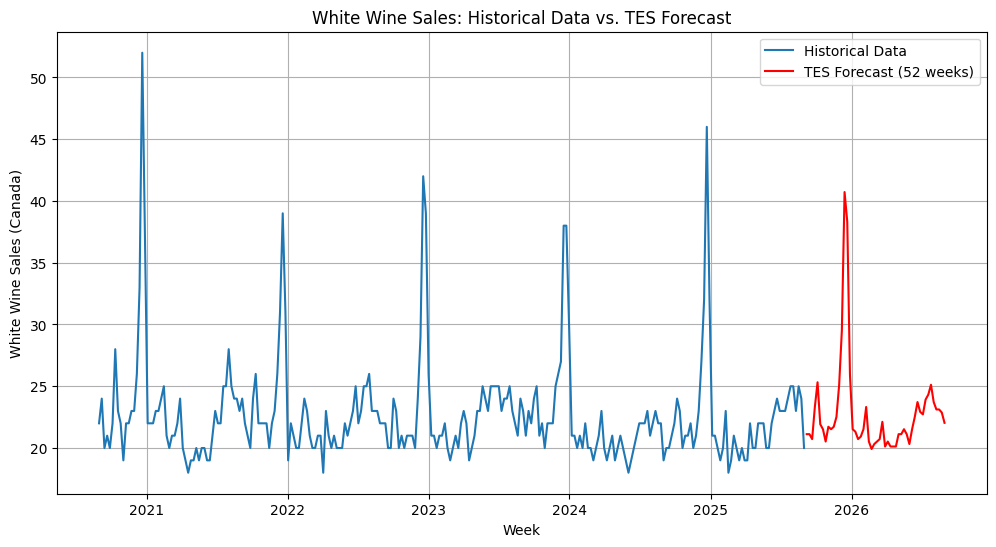

In [70]:
import matplotlib.pyplot as plt

# Plot the historical data
plt.figure(figsize=(12, 6))
plt.plot(wn['Week'], wn['White wine: (Canada)'], label='Historical Data')

# Plot the forecasted data
plt.plot(forecast_series_tes_ww_52w.index, forecast_series_tes_ww_52w.values, label='TES Forecast (52 weeks)', color='red')

plt.xlabel('Week')
plt.ylabel('White Wine Sales (Canada)')
plt.title('White Wine Sales: Historical Data vs. TES Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(wn['White wine: (Canada)'])

# Extract and print the results
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

print(f'ADF Statistic: {adf_statistic:.4f}')
print(f'P-value: {p_value:.4f}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'  {key}: {value:.4f}')

# Interpret the results
if p_value <= 0.05:
    print("\nResult: The time series is likely stationary (reject the null hypothesis).")
else:
    print("\nResult: The time series is likely non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -6.9584
P-value: 0.0000
Critical Values:
  1%: -3.4560
  5%: -2.8728
  10%: -2.5728

Result: The time series is likely stationary (reject the null hypothesis).


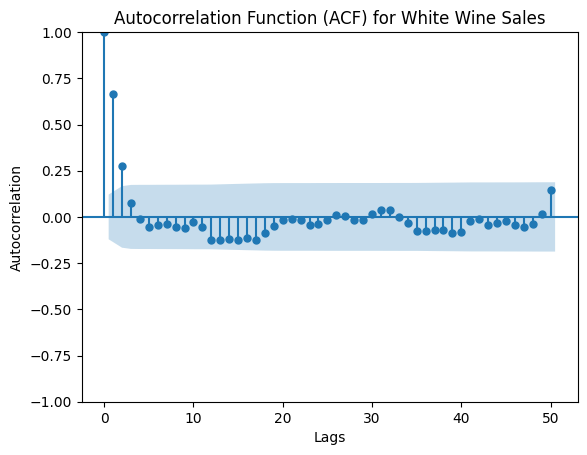

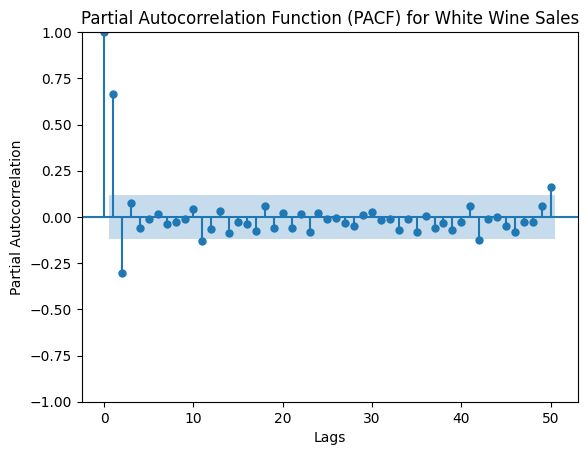

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plot_acf(wn['White wine: (Canada)'], lags=50) # You can adjust the number of lags
plt.title('Autocorrelation Function (ACF) for White Wine Sales')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plot_pacf(wn['White wine: (Canada)'], lags=50) # You can adjust the number of lags
plt.title('Partial Autocorrelation Function (PACF) for White Wine Sales')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [73]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARMA(1,1) model
model_arma_11 = ARIMA(wn['White wine: (Canada)'], order=(1, 0, 1))
fit_model_arma_11 = model_arma_11.fit()

# Display the model summary
print(fit_model_arma_11.summary())

                                SARIMAX Results                                 
Dep. Variable:     White wine: (Canada)   No. Observations:                  262
Model:                   ARIMA(1, 0, 1)   Log Likelihood                -658.132
Date:                  Sat, 06 Sep 2025   AIC                           1324.265
Time:                          16:16:11   BIC                           1338.538
Sample:                               0   HQIC                          1330.001
                                  - 262                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6215      0.763     29.653      0.000      21.126      24.117
ar.L1          0.4548      0.062      7.391      0.000       0.334       0.575
ma.L1          0.4366      0.075    

In [74]:
# Calculate the fitted values from the ARMA model
arma_fitted_values = fit_model_arma_11.fittedvalues

# Calculate MAPE for ARMA(1,1)
mape_arma_ww = mean_absolute_percentage_error(wn['White wine: (Canada)'], arma_fitted_values)
print(f'MAPE (White wine ARMA(1,1)): {mape_arma_ww:.4f}')

# Calculate MSE for ARMA(1,1)
mse_arma_ww = mean_squared_error(wn['White wine: (Canada)'], arma_fitted_values)
print(f'MSE (White wine ARMA(1,1)): {mse_arma_ww:.4f}')

# Calculate RMSE for ARMA(1,1)
rmse_arma_ww = np.sqrt(mse_arma_ww)
print(f'RMSE (White wine ARMA(1,1)): {rmse_arma_ww:.4f}')

MAPE (White wine ARMA(1,1)): 0.0741
MSE (White wine ARMA(1,1)): 8.8753
RMSE (White wine ARMA(1,1)): 2.9792


In [79]:
# Convert the 'Week' column to datetime objects if it hasn't been done already
# This is important for creating the forecast dates correctly
if not pd.api.types.is_datetime64_any_dtype(wn['Week']):
    wn['Week'] = pd.to_datetime(wn['Week'], format='%d/%m/%Y')

# Forecast the next 52 periods (weeks) using the fitted ARMA(1,1) model
forecast_periods_arma_ww_52w = 52
forecast_arma_ww_52w = fit_model_arma_11.forecast(steps=forecast_periods_arma_ww_52w)

# Determine the last date in the dataset
last_date_ww = wn['Week'].iloc[-1]

# Create a date index for the forecast starting from the week AFTER the last date
# The freq='W' ensures weekly frequency
forecast_dates_arma_ww_52w = pd.date_range(start=last_date_ww + pd.Timedelta(weeks=1), periods=forecast_periods_arma_ww_52w, freq='W')

# Create a pandas Series for the forecast with the new dates
forecast_series_arma_ww_52w = pd.Series(forecast_arma_ww_52w.values, index=forecast_dates_arma_ww_52w)

print("White Wine Sales Forecast (ARMA) for the Next 52 Weeks:")
display(forecast_series_arma_ww_52w.to_frame(name='Forecasted Sales (ARMA)'))

White Wine Sales Forecast (ARMA) for the Next 52 Weeks:


,Forecasted Sales (ARMA)
2025-09-07,20.175585
2025-09-14,21.509050
2025-09-21,22.115537
2025-09-28,22.391379
2025-10-05,22.516838
2025-10-12,22.573899
2025-10-19,22.599852
2025-10-26,22.611656
2025-11-02,22.617024
2025-11-09,22.619466


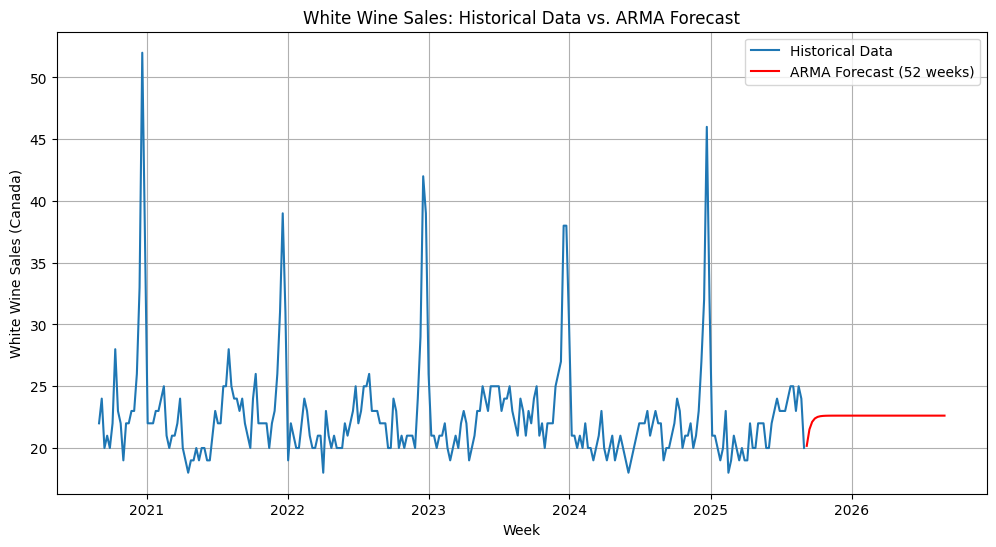

In [80]:
import matplotlib.pyplot as plt

# Plot the historical data
plt.figure(figsize=(12, 6))
plt.plot(wn['Week'], wn['White wine: (Canada)'], label='Historical Data')

# Plot the forecasted data
plt.plot(forecast_series_arma_ww_52w.index, forecast_series_arma_ww_52w.values, label='ARMA Forecast (52 weeks)', color='red')

plt.xlabel('Week')
plt.ylabel('White Wine Sales (Canada)')
plt.title('White Wine Sales: Historical Data vs. ARMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
print("Error Metrics for Different Models:")
print(f"3-Week Moving Average:")
print(f"  MAPE: {mape_ww_3w:.4f}")
print(f"  MSE: {mse_ww_3w:.4f}")
print(f"  RMSE: {rmse_ww_3w:.4f}")
print("\n5-Week Moving Average:")
print(f"  MAPE: {mape_ww_5w:.4f}")
print(f"  MSE: {mse_ww_5w:.4f}")
print(f"  RMSE: {rmse_ww_5w:.4f}")
print("\nSimple Exponential Smoothing (SES):")
print(f"  MAPE: {mape_ses_ww:.4f}")
print(f"  MSE: {mse_ses_ww:.4f}")
print(f"  RMSE: {rmse_ses_ww:.4f}")
print("\nDouble Exponential Smoothing (DES):")
print(f"  MAPE: {mape_des_ww:.4f}")
print(f"  MSE: {mse_des_ww:.4f}")
print(f"  RMSE: {rmse_des_ww:.4f}")
print("\nTriple Exponential Smoothing (TES):")
print(f"  MAPE: {mape_tes_ww:.4f}")
print(f"  MSE: {mse_tes_ww:.4f}")
print(f"  RMSE: {rmse_tes_ww:.4f}")
print("\nARMA(1,1):")
print(f"  MAPE: {mape_arma_ww:.4f}")
print(f"  MSE: {mse_arma_ww:.4f}")
print(f"  RMSE: {rmse_arma_ww:.4f}")

Error Metrics for Different Models:
3-Week Moving Average:
  MAPE: 0.0619
  MSE: 7.0829
  RMSE: 2.6614

5-Week Moving Average:
  MAPE: 0.0843
  MSE: 12.4166
  RMSE: 3.5237

Simple Exponential Smoothing (SES):
  MAPE: 0.0809
  MSE: 11.8092
  RMSE: 3.4364

Double Exponential Smoothing (DES):
  MAPE: 0.0809
  MSE: 11.8091
  RMSE: 3.4364

Triple Exponential Smoothing (TES):
  MAPE: 0.0493
  MSE: 3.2478
  RMSE: 1.8022

ARMA(1,1):
  MAPE: 0.0741
  MSE: 8.8753
  RMSE: 2.9792


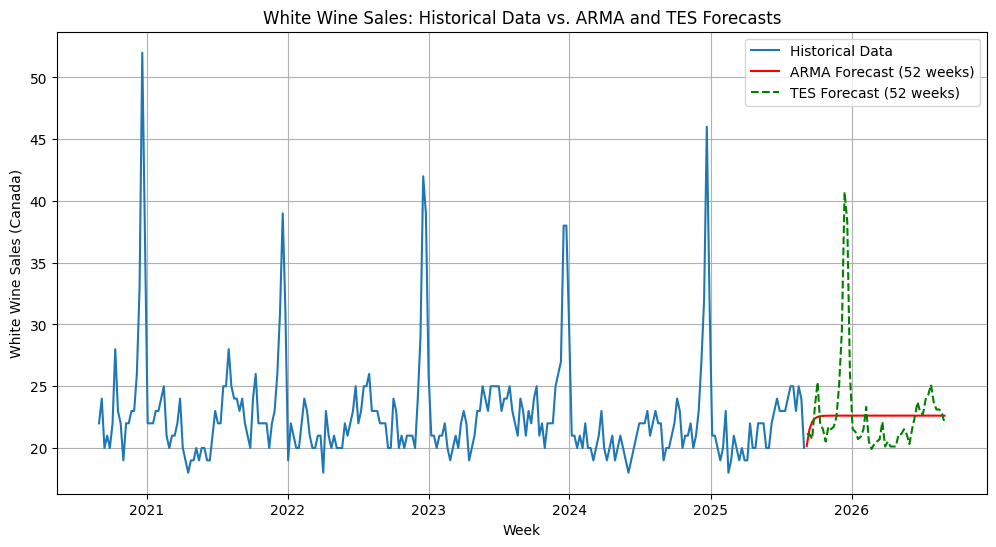

In [83]:
import matplotlib.pyplot as plt

# Plot the historical data
plt.figure(figsize=(12, 6))
plt.plot(wn['Week'], wn['White wine: (Canada)'], label='Historical Data')

# Plot the ARMA forecasted data
plt.plot(forecast_series_arma_ww_52w.index, forecast_series_arma_ww_52w.values, label='ARMA Forecast (52 weeks)', color='red')

# Plot the TES forecasted data
plt.plot(forecast_series_tes_ww_52w.index, forecast_series_tes_ww_52w.values, label='TES Forecast (52 weeks)', color='green', linestyle='--')


plt.xlabel('Week')
plt.ylabel('White Wine Sales (Canada)')
plt.title('White Wine Sales: Historical Data vs. ARMA and TES Forecasts')
plt.legend()
plt.grid(True)
plt.show()